<a href="https://colab.research.google.com/github/sijfosri/-2024UCALCD002/blob/main/Trabajo_Ciencia_de_Datos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importamos librerias

import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Cargar un CSV a un DataFrame

df = pd.read_csv("/content/Social_Network_Ads.csv")

In [4]:
# Obtenemos la información del DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Terminamos de comprobar que no existen valor nulos que comprometan el funcionamiento de nuestro modelo**

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


**En esta instancia tomamos conocimiento de valores importantes para el analsis**

In [6]:
df["Purchased"].unique()

array([0, 1])

***Buscamos saber que tipo de datos puede tomar nuestra etiqueta***

*En este caso el valor de compra afirmativa (1) y el de compra negativa (0)*


In [7]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Male'] = encoder.fit_transform(df['Gender'])
df['Male'] = df['Male'].apply(lambda x: 1 if x == 1 else 0)

In [9]:
#mapping_genero = {"Male" : 0, "Female" : 1}
#df['Gender'] = df['Gender'].map(mapping_genero)

**Nos valemos de utilizar un diccionario para hacer el mapeo del género conviertiendolo en un tipo de dato númerico, ya que lo consideramos una categoría necesaria para la predicción del modelo de regresión**

In [10]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


*De esta manera quedaría el DataFrame compuesto únicamente por valores númericos*

In [11]:
df = df.drop("User ID", axis=1)
df = df.drop("Gender", axis=1)

*En esta celda de código lo que hacemos es hacer un  .drop  en aquellas categorías que no resultan relevantes a la hora de entrenar al modelo*

**Al analizar las categorías relevantes, notamos que el User ID no desempeñaba un rol importante a la hora de realizar una predicción**

**Al igual que la categoría "Gender", al ya haber sido aplicado la función "encoder" en el preprocesado, mantener esta categoría sería totalemente redundante y no sumaría nada a la mejora del modelo**

In [12]:
import plotly.express as px

fig = px.scatter(df, x = "Age", y = "EstimatedSalary", color = "Purchased")
fig.show()

*Al utilizar la librería "plotly.express" conseguimos obtener un excelente gráfico interactivo que permite explorar el dataset a fondo y obtener conociemiento previo a la confección del modelo*



**Aquí podemos visibilizar una relativa segmentación entre los usuarios que no compraron y los que si compraron**

*Que nos permiten realizar ciertas observaciones, tales como, parece ser un patrón frecuente que los usuarios menores a 40 años y con un salario menor a 100 mil tienden a no comprar el producto*

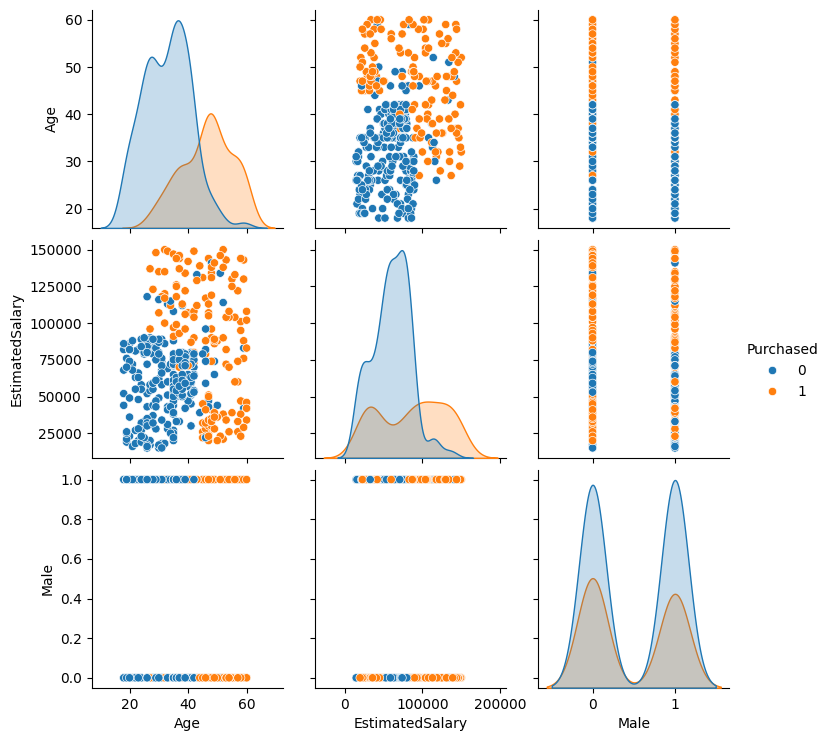

In [13]:
sb.pairplot(df, hue='Purchased')

*Gráficos expuestos a través de una gran función que contiene la librería Seaborn, que nos permiten ver la realción entre las variables de un DataFrame*

**Podemos llegar a observaciones similares que el gráfico anterior**






---



<Axes: >

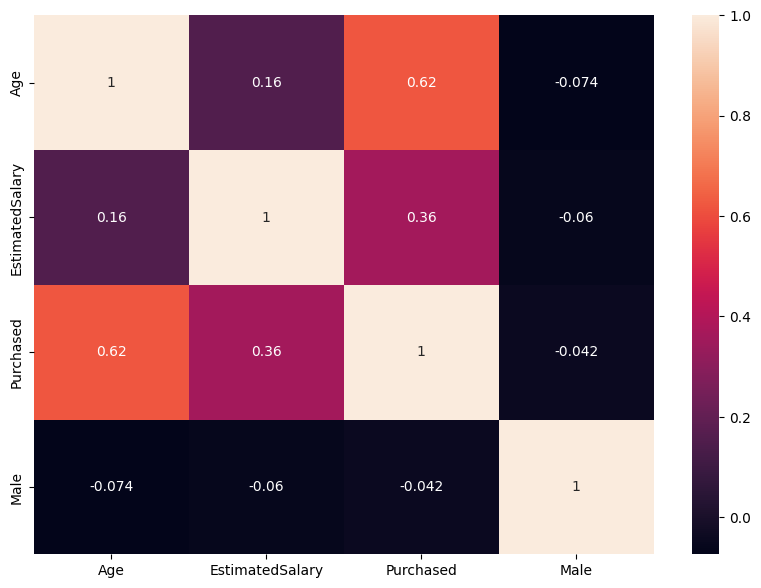

In [14]:
#Heatmap

plt.figure(figsize=(10, 7))
sb.heatmap(df.corr(), annot=True)

El mapa de calor será una representación gráfica excelente para comprobar la correlación entre las variables de nuestro dataset


---



***Como antes se mencionó en los gráficos, podemos reflejar ciertas observaciones:***

*1) Existe una correlación positiva fuerte con respecto a "Age" y "Purchased"*

*2) Al igual, aunque no tan fuerte, entre "EstimatedSalary" y "Purchased"*

In [15]:
cols = df.columns.tolist()
Acomodar_cols =["Age","Male","EstimatedSalary","Purchased"]

df = df[Acomodar_cols]
df

,Age,Male,EstimatedSalary,Purchased
0,19,1,19000,0
1,35,1,20000,0
2,26,0,43000,0
3,27,0,57000,0
4,19,1,76000,0
...,...,...,...,...
395,46,0,41000,1
396,51,1,23000,1
397,50,0,20000,1
398,36,1,33000,0


*En este segmento de código por una cuestión de organización visual en el Dataframe se realizó una reorganización en el orden de las categorías*

In [16]:
from sklearn.model_selection import train_test_split


X = df.drop(["Purchased"], axis=1)
y = df["Purchased"]

*En este segmento del código lo que hacemos es separar las categorías en la varibale "X", mientras la etiqueta es colocada en la variable "Y"*

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =99)

**En esta linea de código designamos el tamaño que tendrá la muestra de prueba para corroborar el funcionamiento de nuestro modelo, sin olvidarse del random_state que le dará ese cáracter de aleatoriedad en la toma de la muestra para el posterior testeo**

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


pipeline = make_pipeline(StandardScaler(), LogisticRegression())
pipeline.fit(X_train, y_train)


#modelo_entrenado = LogisticRegression()
#modelo_entrenado.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

**Extraemos de Sklearn: pipeline. Que es objeto que encapsula múltiples pasos de procesamiento de datos**

*Es este caso realizamos un escalamiento de los datos luego de notar la gran sensibilidad del modelo de regresión lógistica a la hora de tratar con datos de maginitudes dísimiles. Escalar las características ayuda a mantener esta  estabilidad numérica, evitando posibles errores en el entrenamiento del modelo*

In [19]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



Pred_RL = pipeline.predict(X_test)
print(f"La exactitud es: {accuracy_score(y_test, Pred_RL)}")
print(f"La precisión es: {precision_score(y_test, Pred_RL)}")
print(f"El recall es igual a: {recall_score(y_test, Pred_RL)}\n")
print(classification_report(y_test, Pred_RL))

La exactitud es: 0.8875
La precisión es: 0.8571428571428571
El recall es igual a: 0.75

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        56
           1       0.86      0.75      0.80        24

    accuracy                           0.89        80
   macro avg       0.88      0.85      0.86        80
weighted avg       0.89      0.89      0.89        80



**Aquí obtenemos un reporte del algoritmo de LogisticRegression, que contempla:
 precision, recall y f1-score**

In [20]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)

Pred_clf = clf.predict(X_test)
print(f"La exactitud del Arbol de decisión: {accuracy_score(y_test, Pred_clf )}")
print(f"La PRECISION es: {precision_score(y_test, Pred_clf)}\n\n")


pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipeline.fit(X_train, y_train)
Pred_clf_scaled = pipeline.predict(X_test)
print(f"La exactitud luego de haber escalado el modelo de Arbol del decisión es: {accuracy_score(y_test, Pred_clf_scaled)}")
print(f"La PRECISION luego de haber escalado el modelo de Arbol del decisión es: {precision_score(y_test, Pred_clf_scaled)}")


La exactitud del Arbol de decisión: 0.8625
La PRECISION es: 0.782608695652174


La exactitud luego de haber escalado el modelo de Arbol del decisión es: 0.8625
La PRECISION luego de haber escalado el modelo de Arbol del decisión es: 0.782608695652174


Aquí en un único segmento, reciclando la división de los conjuntos de train and test previamente particionados, creamos un algoritmo de DecisionTreeClassifier para poder diferenciar las metricas obtenidas con respecto a la LogisticRegression

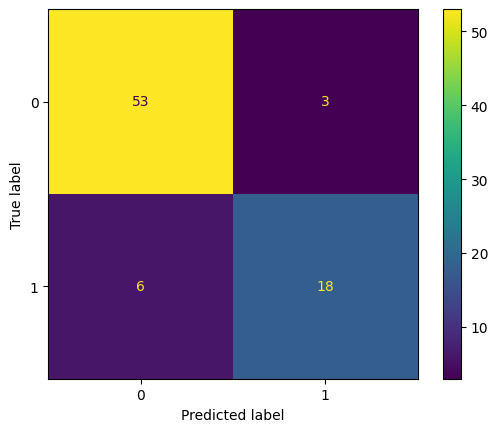

In [21]:
#REGRESIÓN

mc = confusion_matrix(y_test,Pred_RL)

visual_mc = ConfusionMatrixDisplay(mc)
visual_mc.plot()

###Matriz de confusión: LogisticRegression

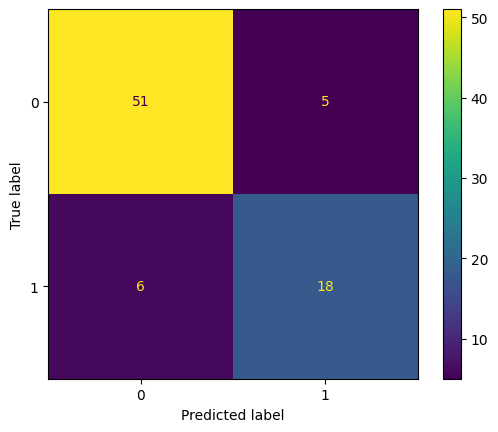

In [22]:
#ARBOL
mc1 = confusion_matrix(y_test,Pred_clf)

visual_mc1 = ConfusionMatrixDisplay(mc1)
visual_mc1.plot()

###Matriz de confusión: DecisionTreeClassifier

In [23]:
accuracy = accuracy_score(y_test, clf.fit(X_train, y_train).predict(X_test))
print(f'Precisión del modelo de Árbol de Decisión: {accuracy:.1f}')

Precisión del modelo de Árbol de Decisión: 0.9


In [24]:
print(f"La precisión de la regresion logistica es: {precision_score(y_test, Pred_RL)}")

La precisión de la regresion logistica es: 0.8571428571428571


**Aca con esta comparacion entre el arbol de decision y la regresion logistica se puede realizar una conclusion final la cual es que la regresion logistica es ayudada por el escalamiento ya que esta nos sirve para que el modelo sea mas preciso**